In [14]:
import os

import numpy as np
import h5py as h5

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import ion_plot_definitions as ipd

import plotting_tools as pt 

import seaborn as sns
sns.set_style("ticks",{'axes.grid': True, "ytick.major.size": 0.1,
                "ytick.minor.size": 0.05,
                'grid.linestyle': '--'
            })

TypeError: plot_data_scatter() got an unexpected keyword argument 'orientation'

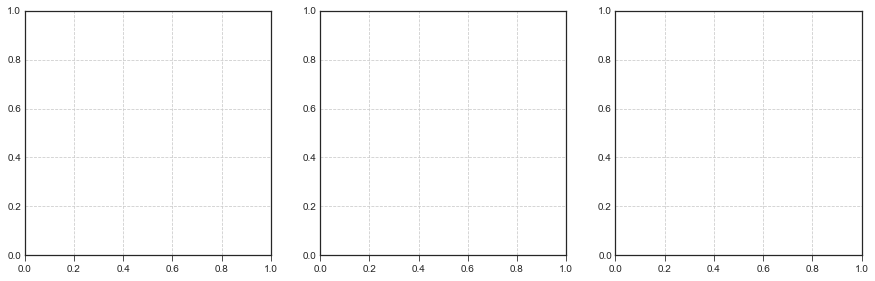

In [15]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (15, 4.5), sharey = False)
orientation = 'edge_theta0'
model       = 'stream'
xfield = 'impact'
yfield = 'col'
set_ylim = True
ion = 'CIII'
#ax[1].set_ylim(5e11, 1e16)
pt.plot_data_scatter(ion, ax = ax[0], xfield = xfield, yfield = yfield, color = 'gray', orientation = orientation, model = model, \
                     label = 'Unfiltered', marker_size = 100, use_filtered = False, set_ylim = set_ylim)
pt.plot_data_scatter(ion, ax = ax[0], xfield = xfield, yfield= yfield, color = 'orange', orientation = orientation, model = model, \
                     label = 'Filtered', marker_size = 100, set_ylim = set_ylim)

yfield = 'vel'
pt.plot_data_scatter(ion, ax = ax[1], xfield = xfield, yfield = yfield, color = 'gray', orientation = orientation, model = model, \
                     label = 'Unfiltered', marker_size = 100, use_filtered = False, set_ylim = set_ylim)
pt.plot_data_scatter(ion, ax = ax[1], xfield = xfield, yfield= yfield, color = 'orange', orientation = orientation, model = model, \
                     label = 'Filtered', marker_size = 100, set_ylim = set_ylim)

yfield = 'bval'
pt.plot_data_scatter(ion, ax = ax[2], xfield = xfield, yfield = yfield, color = 'gray', orientation = orientation, model = model, \
                     label = 'Unfiltered', marker_size = 100, use_filtered = False, set_ylim = set_ylim)
pt.plot_data_scatter(ion, ax = ax[2], xfield = xfield, yfield= yfield, color = 'orange', orientation = orientation, model = model, \
                     label = 'Filtered', marker_size = 100, set_ylim = set_ylim)




impact, col_aodm, col_aodm_err, col_json, col_json_err, flag = \
    pt.load_data(['impact', 'col_aodm', 'col_aodm_err', 'col_json', 'col_json_err', 'flag_aodm'], \
                 model = model, orientation = orientation, ion = ion, use_filtered = False)

test, testerr = pt.load_data(['col', 'colerr'], model = model, orientation = orientation, ion = ion)
print(testerr, flag)
print(col_aodm_err)
#ax[0][1].scatter(impact, 10**col_aodm)
#ax[0][1].scatter(impact, 10**col_json)


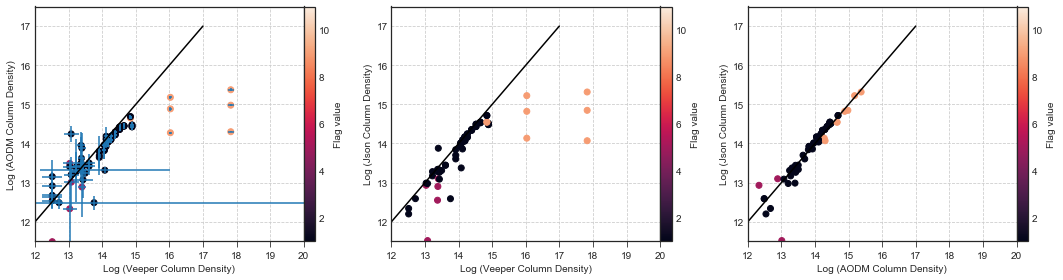

In [20]:
restwave, col, col_aodm, col_json, flag = pt.load_data(['restwave', 'col_veeper', 'col_aodm', 'col_json', 'flag'], use_filtered = False)
ion, model, impact = pt.load_data(['ion','model',  'impact'], use_filtered = False)
col_err, col_aodm_err, col_json_err, eqw_aodm, eqw_aodm_err, eqw_json, eqw_json_err = \
    pt.load_data(['col_err_veeper', 'col_err_aodm', 'col_err_json', 'eqw_aodm', 'eqw_err_aodm', 'eqw_json', 'eqw_err_json'], use_filtered = False)

#mask = (flag == 1) & (model == 'P0') & (ion == 'NIII') 
mask = (impact > 0)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#print(col_err[mask], restwave[mask])

fig, ax = plt.subplots(ncols = 3, figsize = (15, 4))
im = ax[0].scatter(col[mask], col_aodm[mask], c = flag[mask], vmin = 1, vmax = 11)
cbar = plt.colorbar(im, ax = ax[0], pad = 0)
ax[0].errorbar(col[mask], col_aodm[mask], xerr = col_err[mask], yerr = col_aodm_err[mask], linestyle = '')
cbar.set_label('Flag value')
ax[0].plot([12, 17], [12, 17], color ='black')
ax[0].set_xlim(12, 20)
ax[0].set_ylim(11.5, 17.5)
ax[0].set_xlabel('Log (Veeper Column Density)')
ax[0].set_ylabel('Log (AODM Column Density)')

im = ax[1].scatter(col[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[1].errorbar(col[mask], col_json[mask], xerr = col_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[1], pad = 0)
cbar.set_label('Flag value')
ax[1].plot([12, 17], [12, 17], color ='black')
ax[1].set_xlim(12, 20)
ax[1].set_ylim(11.5, 17.5)
ax[1].set_xlabel('Log (Veeper Column Density)')
ax[1].set_ylabel('Log (Json Column Density)')


im = ax[2].scatter(col_aodm[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[2].errorbar(col_aodm[mask], col_json[mask], xerr = col_aodm_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[2], pad = 0)
cbar.set_label('Flag value')
ax[2].plot([12, 17], [12, 17], color ='black')
ax[2].set_xlim(12, 20)
ax[2].set_ylim(11.5, 17.5)
ax[2].set_xlabel('Log (AODM Column Density)')
ax[2].set_ylabel('Log (Json Column Density)')

fig.tight_layout()
#plt.savefig('../../plots/compare_column_flags.png', dpi = 300)

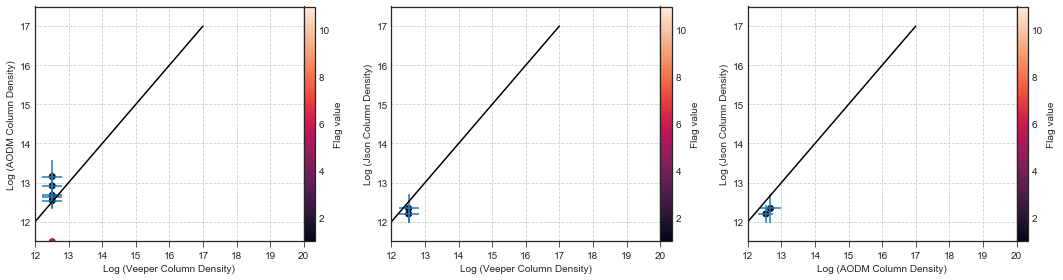

In [26]:
col, col_aodm, col_json, flag = pt.load_data(['col_veeper', 'col_aodm', 'col_json', 'flag'], use_filtered = False)
ion, model, impact = pt.load_data(['ion','model', 'impact'], use_filtered = False)
col_err, col_aodm_err, col_json_err, eqw_aodm, eqw_aodm_err, eqw_json, eqw_json_err = \
    pt.load_data(['col_err_veeper', 'col_err_aodm', 'col_err_json', 'eqw_aodm', 'eqw_err_aodm', \
                  'eqw_json', 'eqw_err_json'], use_filtered = False)
mask = (flag > 0) & (model == 'P0')

mask = (ion == 'SiII')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)


fig, ax = plt.subplots(ncols = 3, figsize = (15, 4))
im = ax[0].scatter(col[mask], col_aodm[mask], c = flag[mask], vmin = 1, vmax = 11)
cbar = plt.colorbar(im, ax = ax[0], pad = 0)
ax[0].errorbar(col[mask], col_aodm[mask], xerr = col_err[mask], yerr = col_aodm_err[mask], linestyle = '')
cbar.set_label('Flag value')
ax[0].plot([12, 17], [12, 17], color ='black')
ax[0].set_xlim(12, 20)
ax[0].set_ylim(11.5, 17.5)
ax[0].set_xlabel('Log (Veeper Column Density)')
ax[0].set_ylabel('Log (AODM Column Density)')

im = ax[1].scatter(col[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
ax[1].errorbar(col[mask], col_json[mask], xerr = col_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[1], pad = 0)
cbar.set_label('Flag value')
ax[1].plot([12, 17], [12, 17], color ='black')
ax[1].set_xlim(12, 20)
ax[1].set_ylim(11.5, 17.5)
ax[1].set_xlabel('Log (Veeper Column Density)')
ax[1].set_ylabel('Log (Json Column Density)')


im = ax[2].scatter(col_aodm[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
ax[2].errorbar(col_aodm[mask], col_json[mask], xerr = col_aodm_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[2], pad = 0)
cbar.set_label('Flag value')
ax[2].plot([12, 17], [12, 17], color ='black')
ax[2].set_xlim(12, 20)
ax[2].set_ylim(11.5, 17.5)
ax[2].set_xlabel('Log (AODM Column Density)')
ax[2].set_ylabel('Log (Json Column Density)')

fig.tight_layout()

(1000, 1800)

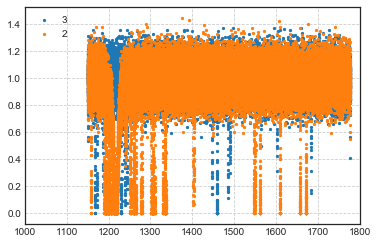

In [93]:
plt.scatter(wl3, flux3, label = '3', s = 5)
plt.scatter(wl2, flux2, label = '2', s = 5)
#plt.scatter(wl, flux, label = '0', s = 5)
plt.legend()
plt.xlim(1000, 1800)
#plt.xlim(1400, 1500)

['HI' 'HI' 'HI' ... 'NV' 'NV' 'NV']


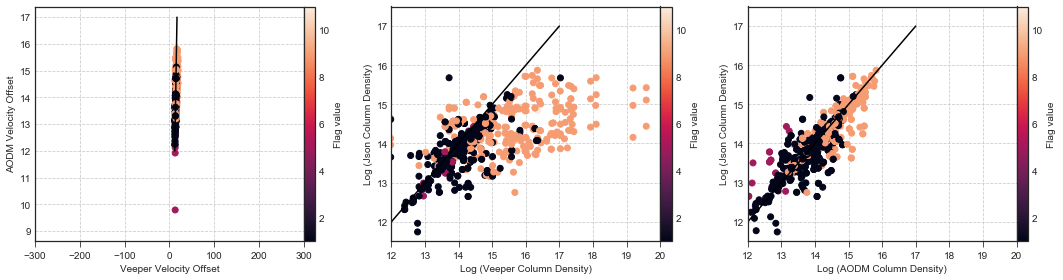

In [9]:
vel, vel_aodm = pt.load_data(['vel', 'vel_aodm'], use_filtered = False)

mask = (flag == 1) & (model == 'anisd') & (impact  == 30) & (ion == 'NIII') 
mask = (impact > 0)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
print(ion[mask])

fig, ax = plt.subplots(ncols = 3, figsize = (15, 4))
im = ax[0].scatter(col[mask], col_aodm[mask], c = flag[mask], vmin = 1, vmax = 11)
cbar = plt.colorbar(im, ax = ax[0], pad = 0)
cbar.set_label('Flag value')
ax[0].plot([12, 17], [12, 17], color ='black')
ax[0].set_xlim(-300, 300)
#ax[0].set_ylim(11.5, 17.5)
ax[0].set_xlabel('Veeper Velocity Offset')
ax[0].set_ylabel('AODM Velocity Offset')

im = ax[1].scatter(col[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[1].errorbar(col[mask], col_json[mask], xerr = col_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[1], pad = 0)
cbar.set_label('Flag value')
ax[1].plot([12, 17], [12, 17], color ='black')
ax[1].set_xlim(12, 20)
ax[1].set_ylim(11.5, 17.5)
ax[1].set_xlabel('Log (Veeper Column Density)')
ax[1].set_ylabel('Log (Json Column Density)')


im = ax[2].scatter(col_aodm[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[2].errorbar(col_aodm[mask], col_json[mask], xerr = col_aodm_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[2], pad = 0)
cbar.set_label('Flag value')
ax[2].plot([12, 17], [12, 17], color ='black')
ax[2].set_xlim(12, 20)
ax[2].set_ylim(11.5, 17.5)
ax[2].set_xlabel('Log (AODM Column Density)')
ax[2].set_ylabel('Log (Json Column Density)')

fig.tight_layout()
#plt.savefig('../../plots/compare_column_flags.png', dpi = 300)

In [6]:
fn = '../../data/analyzed_spectra/filtered_spectra.h5'
data = h5.File(fn, 'r')


In [9]:
impact = data['impact'].value
vel = data['vel'].value

In [10]:
print(len(impact), len(vel))

537 683


In [11]:
mask = data['impact'].value > -99


In [13]:
vel[:537][mask]

array([ 2.60600e+00,  5.85900e+00,  2.53200e+00, -3.73000e-01,
       -4.43700e+00, -4.93900e+00, -2.13800e+00,  6.16300e+00,
        1.73300e+00,  1.73300e+00,  1.24690e+01,  5.01700e+00,
        5.01700e+00,  1.47030e+01,  1.20740e+01, -9.99900e+03,
        1.45960e+01,  1.62410e+01,  1.43820e+01,  1.26520e+01,
        1.26520e+01,  2.83200e+00, -7.74500e+00, -7.74500e+00,
       -1.22200e+00, -9.99900e+03,  6.68500e+00,  8.63500e+00,
        2.57100e+00, -2.31700e+00, -2.31700e+00, -2.40100e+00,
       -7.98700e+00, -7.98700e+00, -9.99900e+03, -4.32100e+00,
       -9.99900e+03, -3.67500e+00, -3.67500e+00, -2.86900e+00,
       -5.73800e+00, -5.73800e+00, -9.99900e+03, -8.65900e+00,
       -9.99900e+03, -9.99900e+03, -9.99900e+03, -7.86900e+00,
       -7.86900e+00, -1.07700e+00, -1.51600e+00, -1.51600e+00,
       -9.99900e+03, -9.99900e+03, -9.99900e+03, -9.99900e+03,
       -9.99900e+03, -9.99900e+03, -9.99900e+03, -9.99900e+03,
       -9.99900e+03, -9.99900e+03, -9.99900e+03, -9.999

In [8]:
import glob
import os
spec_files = glob.glob('../../data/analyzed_spectra/COS-FUV*')
spec = spec_files[0]


In [11]:
os.path.dirname(spec)

'../../data/analyzed_spectra'

In [12]:

ls


NameError: name 'ls' is not defined